# Speech Commands: 
## A Dataset for Limited-Vocabulary Speech Recognition

### https://arxiv.org/pdf/1804.03209.pdf

#### blog
https://petewarden.com/

#### Why you need to improve your training data, and how to do it
https://petewarden.com/2018/05/28/why-you-need-to-improve-your-training-data-and-how-to-do-it/

#### https://github.com/tensorflow/docs/blob/master/site/en/r1/tutorials/sequences/audio_recognition.md

#### TensorFlow Speech Recognition Challenge
https://www.kaggle.com/c/tensorflow-speech-recognition-challenge/



The 20 core words are 
"Yes", "No", "Up", "Down", "Left", "Right", "On", "Off", "Stop", "Go", 
"Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", and "Nine". 

To help distinguish unrecognized words, there are also 
10 auxiliary words, which most speakers only said once. 
These include 
"Bed", "Bird", "Cat", "Dog", "Happy", 
"House", "Marvin", "Sheila", "Tree", and "Wow".

add 5 other words in version 2.0
"Forward", "Backward" , "Learn", "Follow", "Visual", 




https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

Speech Processing for Machine Learning: Filter banks, Mel-Frequency Cepstral Coefficients (MFCCs) and What's In-Between
    

In [1]:
# %%
#
# 讀取 整理過 的資料庫
# gscV2_data.npz == 2.96 GB (3,179,793,526 位元組)
# 它來自  data_speech_commands_v0.02.tar.gz == 2.26 GB (2,428,923,189 位元組)
# 或      train.tar.gz == 2.26 GB (2,428,923,189 位元組)
# 但不包含 test.tar.gz ==  107 MB (   112,563,277 位元組)
#
# 此檔案(gscV2_data.npz) 適合 numpy 讀取，讀取速度相當快。
# 它已經根據資料庫原作者建議，
# 分成 train(84,843), val (9,981), test(11,005) 3個子集合。
# 又從 _background_noise_ 中取出 402 段 1sec 語音，併入 train 中
# 因此，讀出的 3個子集合，內含音檔數 分別為... 
# train(85,245), val (9,981), test(11,005)
#
# 原資料庫宣稱所有語音當都是 1sec, fs= 16000Hz，
# 但事實上有些檔案不及 1sec, 有些又超過 1sec，
# 在 gscV2_data.npz 中， 我們有注意到這個問題，並加以解決，
# 對於太短的檔案僅是簡單的補0來增長，又把過長檔案的兩端各剪掉一點。
# 確定 所有檔案的長度確實為 1sec = 16000點 的語音資料。
#
# 所有的語音資料的值(x_value)已經轉換成 -1.0 ~ +1.0 的 'float32' 實數
# 而其 標籤值(y_value) 為 0 ~ 35 的  'int32' 整數值
#     0 代表 _silence_ 或 _background_noise_
#     1~35 代表 資料庫之詞彙種類
#

In [2]:
basePath= '../ryDatasets/gscV2/'
#basePath= '../ryDatasets/tmp/'
fn= 'gscV2_data.npz'

#
# 請來這裡撈這個整理過的檔案：
# https://1drv.ms/u/s!AjlltK85sd7q2K1ICtdHw29F_wf3cA?e=wGdOpO
# 然後放在 本程式可以讀得到的地方，
# 若與本程式同一資料夾，
# 則上述 basePath 設定如下: 
#
# basePath= './'     # 代表「目前」的資料夾
#

In [3]:
import numpy as np
npzFile= np.load(basePath+fn)


x_train=    npzFile['x_trainWithSil']    
y_train=    npzFile['y_trainWithSil']    
x_val=      npzFile['x_val']      
y_val=      npzFile['y_val']
x_test=     npzFile['x_test']     
y_test=     npzFile['y_test']     


## 以後 x_train, y_train, x_val, y_val, x_test, y_test 會用來用去，
## 因此先把原始資料存好...

x_train_all= x_train
y_train_all= y_train

x_val_all=   x_val
y_val_all=   y_val

x_test_all=  x_test
y_test_all=  y_test

In [4]:
# 完整的詞彙列表，1 + 35 = 36 個英文詞

ryGscList=[ 
 '_silence_',
 'one',  'two', 'three', 'four', 'five',
 'six', 'seven', 'eight', 'nine', 'zero',
 'yes', 'no',
 'go', 'stop',
 'on', 'off',
 'up', 'down',
 'left', 'right',
 'forward', 'backward',
 'marvin', 'sheila',
 'dog', 'cat',
 'bird', 'bed',
 'happy', 'house',
 'learn', 'follow',
 'tree', 'visual',
 'wow'
 ]


In [5]:
# 對資料庫做些統計....

distTrain= [y_train[y_train==x].size for x in range(len(ryGscList))]
distTest=  [y_test[y_test==x].size   for x in range(len(ryGscList))]
distVal=   [y_val[y_val==x].size     for x in range(len(ryGscList))]

distTrain= np.array(distTrain)
distTest=  np.array(distTest)
distVal=   np.array(distVal)

distAll= distTrain + distTest + distVal

aL= list(zip(list(range(len(ryGscList))), 
             ryGscList,  
             list(distAll)))

bL= sorted(aL, key= lambda x:x[1])

cL= sorted(aL, key= lambda x:-x[2])


In [6]:
aL

[(0, '_silence_', 402),
 (1, 'one', 3890),
 (2, 'two', 3880),
 (3, 'three', 3727),
 (4, 'four', 3728),
 (5, 'five', 4052),
 (6, 'six', 3860),
 (7, 'seven', 3998),
 (8, 'eight', 3787),
 (9, 'nine', 3934),
 (10, 'zero', 4052),
 (11, 'yes', 4044),
 (12, 'no', 3941),
 (13, 'go', 3880),
 (14, 'stop', 3872),
 (15, 'on', 3845),
 (16, 'off', 3745),
 (17, 'up', 3723),
 (18, 'down', 3917),
 (19, 'left', 3801),
 (20, 'right', 3778),
 (21, 'forward', 1557),
 (22, 'backward', 1664),
 (23, 'marvin', 2100),
 (24, 'sheila', 2022),
 (25, 'dog', 2128),
 (26, 'cat', 2031),
 (27, 'bird', 2064),
 (28, 'bed', 2014),
 (29, 'happy', 2054),
 (30, 'house', 2113),
 (31, 'learn', 1575),
 (32, 'follow', 1579),
 (33, 'tree', 1759),
 (34, 'visual', 1592),
 (35, 'wow', 2123)]

In [7]:
# 設定 3個子集合(Dgt, Yes, Oth)，以及全部(All)。

#  Dgt= 10 個數字
CmdList= DgtList=  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Yes= 10 個 Cmd，    「是、否、去、停、 開、關、上、下、  左、右」。
CmdList= YesList=  [0, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# 其他 15 個。
CmdList= OthList= [ 0, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

# 總共 10 + 10 + 15 == 35
CmdList= AllList= list(range(0,36))


In [8]:
# 選好 CmdList 即可完整跑到底....
# Dgt 辨識率最高，可先選來做做看

#CmdList= DgtList
#CmdList= YesList
#CmdList= OthList
CmdList= AllList

CmdList= np.array(CmdList)


In [9]:

# 選擇 子集合來建立 模型

s_trainCmd= np.isin(y_train_all, CmdList)
s_valCmd=   np.isin(y_val_all,   CmdList)
s_testCmd=  np.isin(y_test_all,  CmdList)

x_trainCmd= x_train_all[s_trainCmd]
y_trainCmd= y_train_all[s_trainCmd]

x_valCmd=   x_val_all[s_valCmd]
y_valCmd=   y_val_all[s_valCmd]

x_testCmd=  x_test_all[s_testCmd]
y_testCmd=  y_test_all[s_testCmd]

# 把 label 從 0, 1, 2,... 降到 0, 1, 2,....
# 對 Dgt 子集合而言，不做沒關係，但 Yes, Oth 都必須做，因此一視同仁通通做吧。
#
CmdDict= dict([(v,k) for k,v in enumerate(CmdList)])

y_train= np.array([CmdDict[x] for x in y_trainCmd])
y_val=   np.array([CmdDict[x] for x in y_valCmd])
y_test=  np.array([CmdDict[x] for x in y_testCmd])


# 選擇 語音資料子集合來建立 模型

x_train=    x_trainCmd    
x_val=      x_valCmd
x_test=     x_testCmd


In [10]:
# 檢查一下 類別總數 (nCaters)，
# Dgt= 11, Yes=11, Oth=16, All=36
#

nCategs= len(set(y_train)) #36 #c_train.size #36

print(f'nCategs= {nCategs}')


nCategs= 36


In [11]:
## 重要演算法 開始囉....

def ryFeature(x, 
           sample_rate= 16000, 
           
           frame_length=  256, #1024,
           frame_step=    160, #128,  # frame_length//2
           
           num_mel_bins=     256//8, #32, #100,   #128,
           lower_edge_hertz=   0,     # 0
           upper_edge_hertz= 16000/2, # sample_rate/2   
           
           mfcc_dim= 16 #13
           ):
    
    stfts= tf.signal.stft(x, 
                          frame_length, #=  256, #1024, 
                          frame_step, #=    128,
                          #fft_length= 1024
                          pad_end=True
                          )
    
    spectrograms=     tf.abs(stfts)
    log_spectrograms= tf.math.log(spectrograms)# + 1e-10)
    
    # Warp the linear scale spectrograms into the mel-scale.
    num_spectrogram_bins= stfts.shape[-1]  #.value
    
    
    linear_to_mel_weight_matrix= tf.signal.linear_to_mel_weight_matrix(
          num_mel_bins, 
          num_spectrogram_bins, 
          sample_rate, 
          lower_edge_hertz,
          upper_edge_hertz)
    
    '''
    mel_spectrograms= tf.tensordot(
          spectrograms, 
          linear_to_mel_weight_matrix, 1)
    
    '''
    
    W= linear_to_mel_weight_matrix
      
    W1= W/ tf.math.reduce_sum(W, axis=0)  # 我把 那些 三角形濾波器 sum to one 了。
    
    mel_spectrograms= spectrograms @ W1  # 這行取代 tensordot()
    
    # 以下這行似乎無作用
    '''
    mel_spectrograms.set_shape(
          spectrograms.shape[:-1].concatenate(
              linear_to_mel_weight_matrix.shape[-1:]))
    '''
    
    # Compute a stabilized log to get log-magnitude mel-scale spectrograms.
    log_mel_spectrograms= tf.math.log(mel_spectrograms + 1e-10) # 加上 1e-10 避免 log(0) 的出現
    
    # Compute MFCCs from log_mel_spectrograms and take the first 13.
    mfccs= tf.signal.mfccs_from_log_mel_spectrograms(
          log_mel_spectrograms)[..., :mfcc_dim]
    
    feature= {'mfcc':               mfccs, 
              'log_mel_spectrogram':log_mel_spectrograms, 
              
              'log_spectrogram':    log_spectrograms,  # 以下 2個 不太有用，留下僅供參考。
              'spectrogram':        spectrograms}
    
    return  feature

def get_all_fearure(all_x, batch_size= 1000):
    t0= time.time()
    
    x= all_x.astype(np.float32)
    
    #batch_size= 1000  # 預防 gpu memory 不夠， 分批作業 
    
    i=0
    XL=[]
    while i < x.shape[0]:
        
        if i+batch_size<=x.shape[0]:
            xx= x[i:i+batch_size]
        else:
            xx= x[i:]
        
        X= ryFeature(xx)['mfcc']
        
        '''
        X0256= ryFeature(xx, frame_length= 256, num_mel_bins= 256//8)['mfcc']      
        X1024= ryFeature(xx, frame_length=1024, num_mel_bins=1024//8)['mfcc']
        X= tf.concat([X0256, X1024], axis=-1)
        '''
        
        i  += batch_size
        XL += [X]
    
    #XL= np.concatenate(XL)
    XL= tf.concat(XL, axis= 0)
    print('XL.shape={}'.format(XL.shape))
    
    dt= time.time()-t0
    print('tf.signal.stft, 執行時間 dt= {}'.format(dt))
    
    '''
    XL.shape=(64721, 125, 129) # nTime= 16000/128, nFreq=256/2+1
    tf.signal.stft, dt= 8.066392660140991
    '''
    return XL


In [12]:
print('.... get_all_fearure() .... ')

import time
import tensorflow as tf

t0= time.time()

X_test=     get_all_fearure(x_test)
X_val=      get_all_fearure(x_val)
X_train=    get_all_fearure(x_train)

dt= time.time()- t0
print('... get_all_fearure() ... dt(sec)= {:.3f}'.format(dt))


.... get_all_fearure() .... 
XL.shape=(11005, 100, 16)
tf.signal.stft, 執行時間 dt= 2.7040350437164307
XL.shape=(9981, 100, 16)
tf.signal.stft, 執行時間 dt= 0.6256437301635742
XL.shape=(85245, 100, 16)
tf.signal.stft, 執行時間 dt= 5.741328477859497
... get_all_fearure() ... dt(sec)= 9.529


In [13]:
# 檢查 X_train 的 形狀
nTime, nFreq= X_train[0].shape
nTime, nFreq

(100, 16)

In [14]:
# 要對 X_* 們作 正規化

def normalize(x, axis= None):   
    if axis== None:
        #x= (x-x.mean())/x.std()
        x= (x - tf.math.reduce_mean(x)
            )/tf.math.reduce_std(x)
    else:
        #x= (x-x.mean(axis= axis))/x.std(axis= axis)
        x= (x - tf.math.reduce_mean(x, axis)
            )/tf.math.reduce_std(x, axis)
    
    return x

print('.... normalize() ....')

X_train= tf.reshape(X_train, (-1, nTime, nFreq ,1))
X_val=   tf.reshape(X_val,   (-1, nTime, nFreq ,1))
X_test=  tf.reshape(X_test,  (-1, nTime, nFreq ,1))

X_train=     normalize(X_train) 
X_val=       normalize(X_val)   
X_test=      normalize(X_test)  


.... normalize() ....


In [15]:
# 檢查一下，mean 應為 0, std 應為 1
tf.math.reduce_mean(X_train), tf.math.reduce_std(X_train)


(<tf.Tensor: id=32342, shape=(), dtype=float32, numpy=2.6706684e-09>,
 <tf.Tensor: id=32349, shape=(), dtype=float32, numpy=0.99999994>)

In [16]:
# 以上先把語音資料庫處理完畢，並作了 特徵擷取 (mfcc)
# 接著要進入 cnn + dnn 神經網路 建模了....


In [17]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models    import Model, load_model


In [18]:
# 啟動 tf.keras
tf.keras.backend.clear_session()  

# 準備好模型的檔名以便訓練時儲存。
fnModel= 'ryAsr2020_ryTrainModel.hdf5'
print(f"... fnModel= {fnModel}")

... fnModel= ryAsr2020_ryTrainModel.hdf5


In [19]:
#
#  開始設立 CNN 模型，盡量簡單為要。。。
# 【Simple is Beautiful】
#  
def ryCnn(nTime, nFreq, nCategories):
    
    x= Input(shape= (nTime, nFreq, 1))
    
    h= x      
    h= Conv2D(10,   (10, nFreq), 
              activation='relu', 
              padding='same', 
              strides=(2, nFreq)
              )(h)    
    h= MaxPooling2D((2,1), padding='same')(h)    
    h= Dropout(0.1)(h)
           
    h= Flatten()(h)
    h= Dense(100,  activation='relu')(h)  
    h= Dropout(0.1)(h)      
    h= Dense(nCategs,  activation='softmax')(h)    
    y= h
    
    m= Model(inputs=  x, 
             outputs= y)    
    m.summary()
    return m


In [20]:
m= ryCnn(nTime, nFreq,  nCategories= nCategs) 
    
m.compile(  
        loss=    'sparse_categorical_crossentropy',
        metrics= ['accuracy'])

es= EarlyStopping(
        monitor=   'val_loss', 
        min_delta= 1e-10,
        patience=  10, 
        mode=      'min', 
        verbose=   1) 

mc= ModelCheckpoint(fnModel, 
        monitor=    'val_accuracy', 
        verbose=    1, 
        save_best_only= True, 
        mode=      'max')


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 16, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 1, 10)         1610      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 1, 10)         0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 1, 10)         0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               25100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0     

In [21]:
### 要正式跑【模型訓練】了

# 通常會很久，故 監視一下時間 ...
t0= time.time() 

h= m.fit(X_train, y_train,
         
        batch_size=100, #1000, # 1000
        epochs=    100,
        
        callbacks=[es, mc],
        
        #validation_split= 0.1
        validation_data= (X_val, y_val)
        )

dt= time.time()- t0
print('... h= m.fit() ... dt(sec)= {}'.format(dt))

## 紀錄一下 我在 家中電腦 跑的結果以資參考...

_=''' 桌機上跑的結果 (with GPU, Nvidia 1080Ti)
Epoch 60/100
31000/31560 [============================>.] - ETA: 0s - loss: 0.1614 - accuracy: 0.9465
Epoch 00060: 【val_accuracy】 did not improve from 【0.94236】
31560/31560 [==============================] - 1s 25us/sample - loss: 0.1618 - accuracy: 0.9465 - val_loss: 0.2368 - val_accuracy: 0.9380
Epoch 00060: early stopping
... h= 【m.fit()】 ... dt(sec)= 【54.17984127998352】(約 1 min)

'''

_=''' 筆電上跑的結果 (without GPU), for subset Dgt (10 個英文數字詞) 
Epoch 00049: 【val_accuracy】 did not improve from 【0.93769】
31560/31560 [==============================] - 13s 400us/sample - loss: 0.1808 - accuracy: 0.9416 - val_loss: 0.2403 - val_accuracy: 0.9325
Epoch 00049: early stopping
... h= 【m.fit()】 ... dt(sec)= 【595.3162362575531】(約 10 min)
'''

_=''' 筆電(CPU= 8, RAM= 8G, without Nvidia GPU)上跑的結果 , for All (35 英文詞) 
Epoch 00052: val_accuracy did not improve from 【0.81745】
85245/85245 [==============================] - 32s 377us/sample - loss: 0.7613 - accuracy: 0.7752 - val_loss: 0.6583 - val_accuracy: 0.8159
Epoch 00052: early stopping
... h= 【m.fit()】 ... dt(sec)= 【1896.6248784065247】 (約 30 min)
'''

_=''' 桌機，for All (35 英文詞)
Epoch 00042: val_accuracy did not improve from 0.81274
85245/85245 [==============================] - 2s 25us/sample - loss: 0.7489 - accuracy: 0.7777 - val_loss: 0.6775 - val_accuracy: 0.8078
Epoch 00042: early stopping
... h= m.fit() ... dt(sec)= 【95.36719369888306】 (約 1.5 min， 約是無GPU筆電的20倍速度。)
'''

Train on 85245 samples, validate on 9981 samples
Epoch 1/100
85000/85245 [============================>.] - ETA: 0s - loss: 2.5179 - accuracy: 0.2966
Epoch 00001: val_accuracy improved from -inf to 0.52099, saving model to ryAsr2020_ryTrainModel.hdf5
85245/85245 [==============================] - 3s 40us/sample - loss: 2.5159 - accuracy: 0.2971 - val_loss: 1.7561 - val_accuracy: 0.5210
Epoch 2/100
84600/85245 [============================>.] - ETA: 0s - loss: 1.6429 - accuracy: 0.5259
Epoch 00002: val_accuracy improved from 0.52099 to 0.64703, saving model to ryAsr2020_ryTrainModel.hdf5
85245/85245 [==============================] - 2s 26us/sample - loss: 1.6422 - accuracy: 0.5262 - val_loss: 1.2532 - val_accuracy: 0.6470
Epoch 3/100
85000/85245 [============================>.] - ETA: 0s - loss: 1.3630 - accuracy: 0.6012
Epoch 00003: val_accuracy improved from 0.64703 to 0.68951, saving model to ryAsr2020_ryTrainModel.hdf5
85245/85245 [==============================] - 2s 25us/sample -

Epoch 26/100
84800/85245 [============================>.] - ETA: 0s - loss: 0.7827 - accuracy: 0.7658
Epoch 00026: val_accuracy did not improve from 0.80904
85245/85245 [==============================] - 2s 26us/sample - loss: 0.7829 - accuracy: 0.7658 - val_loss: 0.7117 - val_accuracy: 0.7960
Epoch 27/100
84900/85245 [============================>.] - ETA: 0s - loss: 0.7796 - accuracy: 0.7653
Epoch 00027: val_accuracy did not improve from 0.80904
85245/85245 [==============================] - 2s 26us/sample - loss: 0.7802 - accuracy: 0.7652 - val_loss: 0.6891 - val_accuracy: 0.8080
Epoch 28/100
84000/85245 [============================>.] - ETA: 0s - loss: 0.7750 - accuracy: 0.7688
Epoch 00028: val_accuracy improved from 0.80904 to 0.80964, saving model to ryAsr2020_ryTrainModel.hdf5
85245/85245 [==============================] - 2s 28us/sample - loss: 0.7757 - accuracy: 0.7686 - val_loss: 0.6647 - val_accuracy: 0.8096
Epoch 29/100
83900/85245 [============================>.] - ETA: 0

In [22]:
# 最後再跑個 測試辨識率
m.evaluate(X_test,      y_test,      verbose=2)

11005/1 - 0s - loss: 0.7127 - accuracy: 0.8070


[0.681186114799321, 0.8069968]

In [23]:
import matplotlib.pyplot as pl
import sounddevice as sd

#  找 1 個 語音來測試
randomIndex= 1000

x= x_test[randomIndex]
X= X_test[randomIndex]

X=    tf.reshape(X, (1, X.shape[0], X.shape[1], 1))
prob= m.predict(X)[0]

sortIndex=  prob.argsort()[-1::-1]
sortProb=   prob[sortIndex]

sortPred=    np.array(ryGscList)[CmdList[sortIndex]] ## 這行有點錯綜複雜！！

print(f'sortPred= {sortPred}') # topN recognition result
print(f'sortProb= {sortProb}')

sortPred= ['tree' 'three' 'eight' 'two' 'six' 'happy' 'sheila' 'seven' 'bird' 'zero'
 'right' 'bed' 'visual' 'go' 'four' 'five' 'nine' 'cat' 'stop' 'yes'
 'left' 'learn' 'forward' 'down' 'marvin' 'one' 'follow' 'dog' 'no' 'up'
 'house' 'on' 'backward' 'off' 'wow' '_silence_']
sortProb= [9.0568674e-01 9.4293833e-02 1.9089339e-05 3.2677056e-07 3.8888821e-08
 3.7549682e-08 5.7117444e-09 3.3060445e-09 7.2959871e-10 6.8103173e-10
 4.7722837e-10 5.0886791e-11 1.3780893e-11 4.5019907e-13 3.3657951e-13
 2.4912575e-13 6.9946077e-14 6.0115399e-14 2.2986540e-14 4.7134537e-15
 3.1815540e-15 1.2269587e-15 2.4659522e-16 5.6507791e-17 1.6607224e-17
 7.4065562e-18 3.7950108e-18 3.5245434e-18 2.7606055e-18 1.8082051e-19
 1.1975421e-19 1.7601494e-20 4.9149225e-22 1.2020851e-22 4.5162330e-28
 4.9337289e-36]


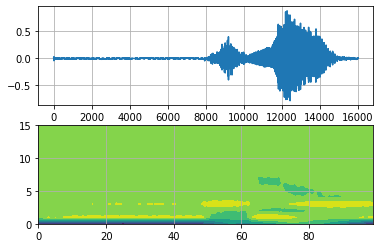

In [24]:
# Visualize the data

sd.play(x, 16000)

pl.subplot(2,1,1);pl.grid('on');pl.plot(x)

X= X.numpy().squeeze().transpose()
pl.subplot(2,1,2);pl.grid('on');pl.contourf(X)#, levels=100)

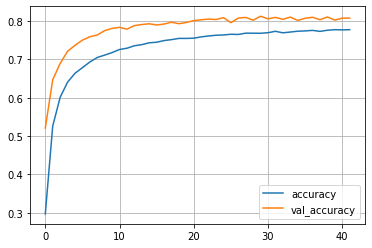

In [25]:
# 畫個 訓練過程 acc 變化的圖形...

from matplotlib import pyplot as pl

def plot_train_history(h):
    v0= h.history['accuracy']
    v1= h.history['val_accuracy']
    pl.plot(v0, label='accuracy')
    pl.plot(v1, label='val_accuracy')
    pl.legend()
    pl.grid('on')
    pl.show()

plot_train_history(h)

In [26]:
# 最後，作個實作系統來玩玩...

import numpy as np
from tensorflow.keras.models import load_model

import sounddevice as sd

labels= np.array(ryGscList)

fnModel= 'ryAsr2020_ryTrainModel.hdf5'

model= load_model(fnModel)


def predict(x, probOut= False, indexMapping= None):
    
    x= tf.reshape(x, (1, x.shape[0], x.shape[1], 1))
    
    prob=  model.predict(x)
    index= np.argmax(prob[0])
    maxProb= np.max(prob[0])
    
    if indexMapping != None:
        index= indexMapping[index]
        
    y= labels[index]
    
    if probOut==True:
        return (y, maxProb)
    else:
        return y


def recWav(x, probOut= False): #, indexMapping= None):
    
    x= x.flatten()    

    X= ryFeature(x)['mfcc']
        
    X= normalize(X)  # normalized for only one utterence x

    #y= predict(X, probOut= probOut, indexMapping= indexMapping)
    
    X= tf.reshape(X, (1, X.shape[0], X.shape[1], 1))
    
    prob=  model.predict(X)[0]
    index=   prob.argsort()[-1::-1]#np.argmax(prob)
    maxProb= prob[index] #np.max(prob)
    
    #if indexMapping != None:
    #    index= indexMapping[index]
    index= CmdList[index]    
    
    y= labels[index]
    
    if probOut==True:
        y= np.vstack((y, maxProb))
    return y
    




In [27]:
T=  1     # Duration of recording
fs= 16000  # Sample rate
def speak_and_recognize():
    print(f'''
    press a key to record 1 sec of speech ...
    you can say: {labels[CmdList]}
    please say it within 1 sec...
    ''')
    input() 
    x= sd.rec(int(T*fs), 
            samplerate= fs, 
            channels= 1, 
            dtype='float32')

    sd.wait()  # Wait until recording is finished

    y= recWav(x, probOut=True)#, indexMapping= CmdList) 

    print('y= {}'.format(y))

for i in range(10):
    speak_and_recognize()



    press a key to record 1 sec of speech ...
    you can say: ['_silence_' 'one' 'two' 'three' 'four' 'five' 'six' 'seven' 'eight'
 'nine' 'zero' 'yes' 'no' 'go' 'stop' 'on' 'off' 'up' 'down' 'left'
 'right' 'forward' 'backward' 'marvin' 'sheila' 'dog' 'cat' 'bird' 'bed'
 'happy' 'house' 'learn' 'follow' 'tree' 'visual' 'wow']
    please say it within 1 sec...
    

y= [['one' 'on' 'wow' 'learn' 'marvin' 'nine' 'four' 'left' 'right'
  'forward' 'five' 'down' 'off' 'follow' 'bird' 'backward' 'dog' 'no'
  'up' 'go' 'bed' 'seven' 'stop' 'two' 'three' 'happy' 'yes' 'zero'
  'sheila' 'eight' 'visual' 'house' 'cat' 'tree' 'six' '_silence_']
 ['0.9231221' '0.03340952' '0.018456668' '0.0068795285' '0.0058341995'
  '0.0041867713' '0.0031400563' '0.0009404039' '0.0008454047'
  '0.00078824285' '0.0006847419' '0.00033731008' '0.0003289102'
  '0.00016894595' '0.00016616592' '0.00016160958' '0.0001433213'
  '0.00011402297' '0.000111382906' '0.00010048912' '1.8377628e-05'
  '1.7433671e-05' '1.67644


y= [['eight' 'two' 'three' 'tree' 'six' 'yes' 'happy' 'sheila' 'visual'
  'bed' 'right' 'five' 'nine' 'zero' 'go' 'one' 'left' 'cat' 'down'
  'bird' 'no' 'seven' 'learn' 'four' 'marvin' 'on' 'dog' 'follow' 'stop'
  'forward' 'off' 'house' 'wow' 'up' 'backward' '_silence_']
 ['0.77086186' '0.110127605' '0.034620058' '0.01370834' '0.012516093'
  '0.011225389' '0.010508053' '0.006854624' '0.004859831' '0.0046505164'
  '0.0039541926' '0.0029388932' '0.0027143871' '0.0026336506'
  '0.001802234' '0.0015248287' '0.00089430186' '0.00066635176'
  '0.00043757964' '0.00041578984' '0.0003759473' '0.00036273376'
  '0.00030246266' '0.00027943737' '0.00018978964' '0.00017376425'
  '0.00014047508' '0.0001313216' '5.21931e-05' '2.7229325e-05'
  '2.1180389e-05' '1.4948527e-05' '5.8946766e-06' '4.7166727e-06'
  '3.271284e-06' '7.933117e-13']]

    press a key to record 1 sec of speech ...
    you can say: ['_silence_' 'one' 'two' 'three' 'four' 'five' 'six' 'seven' 'eight'
 'nine' 'zero' 'yes' 'no' 'go'

In [28]:
print('... ry: Good Luck for you in 2020 ...')

... ry: Good Luck for you in 2020 ...
